# <span style = "color: lightblue"> Mall Customers Clustering</span>

***

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Mall Customer data is an interesting dataset that has hypothetical customer data. It puts you in the shoes of the owner of a supermarket. You have customer data, and on this basis of the data, you have to divide the customers into various groups.

The Clustering Explained:

Clustering algorithms try to find natural clusters in data, the various aspects of how the algorithms to cluster data can be tuned and modified. Clustering is based on the principle that items within the same cluster must be similar to each other. The data is grouped in such a way that related elements are close to each other.

Here, We will be using K-Means Clustering algorithm to find natural cluster in our data.

K-Means Clustering

K-Means clustering is an unsupervised machine learning algorithm that divides the given data into the given number of clusters. Here, the “K” is the given number of predefined clusters, that need to be created.

It is a centroid based algorithm in which each cluster is associated with a centroid. The main idea is to reduce the distance between the data points and their respective cluster centroid.

The algorithm takes raw unlabelled data as an input and divides the dataset into clusters and the process is repeated until the best clusters are found.

K-Means is very easy and simple to implement. It is highly scalable, can be applied to both small and large datasets. There is, however, a problem with choosing the number of clusters or K. Also, with the increase in dimensions, stability decreases. But, overall K Means is a simple and robust algorithm that makes clustering very easy.

## <span style = "color: blue"> Contents </span>

The dataset contains following features
* CustomerID
* Genre (Gender)
* Age
* Annual Income(k$)
* Spending Score(1-100)

## Let's Begin

### Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Mall_Customers.csv' and store it in a DataFrame

In [2]:
df = pd.read_csv('Mall_Customers.csv')

### View top 5 rows

In [18]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### View info of the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### View basic statistical information about the dataset

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Check for null values

In [21]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### View unique values in Genre

In [22]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Genre

In [4]:
def convert(x):
    if x == 'Male':
        return 0
    else:
        return 1

In [7]:
df['Genre'] = df['Genre'].apply(convert)

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Drop CustomerID

In [10]:
df.drop(columns=['CustomerID'], inplace = True)

## <span style = "color: orange"> Visualization</span>

### Create a scatterplot of Annual Income vs Spending Score with respect to Genre

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

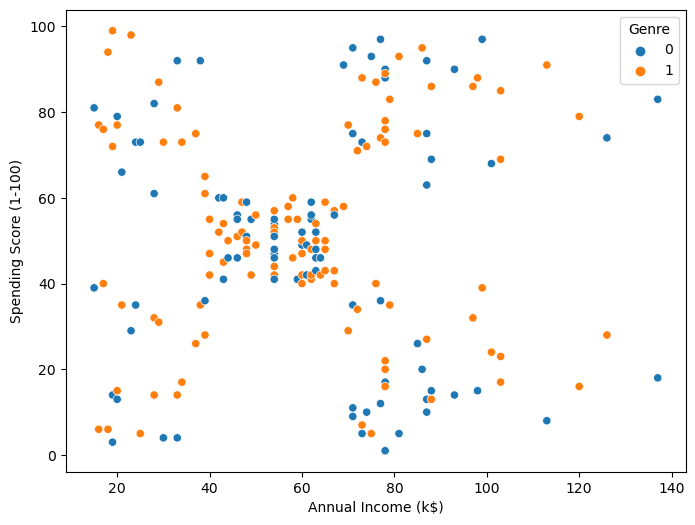

In [12]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['Genre'])

### Create a scatterplot of Age vs Spending score with respect to Genre

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

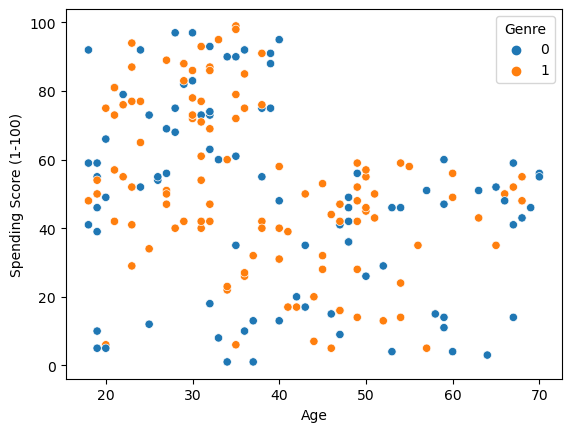

In [13]:
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'], hue = df['Genre'])

### Create a K-Means Clustering Model

In [14]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=3)

### Fit and Predict Clusters 

In [ ]:
cluster = model.fit_predict(df)

### Add Cluster values to our DataFrame

In [20]:
df["Cluster"] = cluster

In [21]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


### Check all unique values in our cluster

In [23]:
df['Cluster'].unique()

array([0, 1, 2])

## <span style = "color: green"> Visualizing the clusters </span>

#### Assign each cluster to a new Dataframe

In [24]:
df0 = df[df['Cluster'] == 0]
df1 = df[df['Cluster'] == 1]
df2 = df[df['Cluster'] == 2]

#### Plot scatterplot of each of the new dataframes with X-axis = Annual income and Y-axis = Spending Score

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

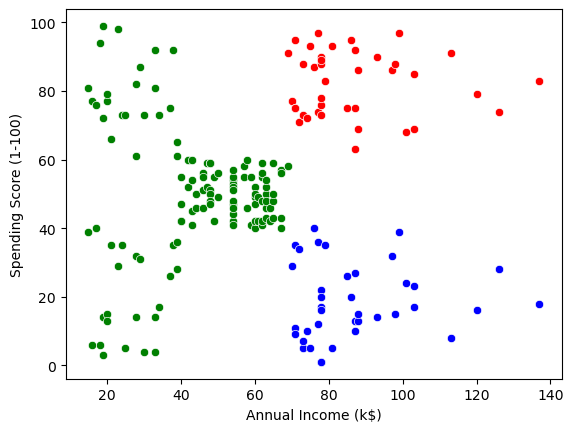

In [26]:
sns.scatterplot(x = df0['Annual Income (k$)'], y = df0['Spending Score (1-100)'], color = 'green')
sns.scatterplot(x = df1['Annual Income (k$)'], y = df1['Spending Score (1-100)'], color = 'red')
sns.scatterplot(x = df2['Annual Income (k$)'], y = df2['Spending Score (1-100)'], color = 'blue')

***